# Feature tuning

Masterproject David Degen:

In this notebook, we attempt to decorrelate the entries of the scattering matrix $P_{11}$ and $P_{12}$.
This would be favoured for correlations between input variables increase the complexity of our model.
The transformations we can perform must, however, keep our signal to uncertainty ratio on a reasonable level, otherwise we loose information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions.preprocessing import no_path_find_raw_data

Load Data

In [2]:
# automatically
p_11, p_12_m = no_path_find_raw_data()

Available Data sets:
{0: 'simulation_1'}
simulation_1 was chosen.

Content of the dataset folder with suffix 'pkl':
['P12_information_new.pkl', 'P11_information_new.pkl']

Sucessfully auto matched the following data sets:
P11: P11_information_new.pkl
P12: P12_information_new.pkl


In [ ]:
# or manually
path = '/data/user/degen_d/aerosol/aerosol_data/simulation_1/'
p_11 = pd.read_pickle(path + "P11_information_new.pkl")
p_12_m = pd.read_pickle(path + "P12_information_new.pkl").iloc[:, 1:180]

Transform back to $P_{11}$ and $P_{12}$

In [3]:
p_11 = p_11.iloc[:, 1:180]
p_12_m = p_12_m.iloc[:, 1:180]

In [4]:
# Assuming that p_12_m = -p_12/p_11 we retrieve p_12 with
p_12 = -p_12_m*p_11

Plot correlations of different transformations

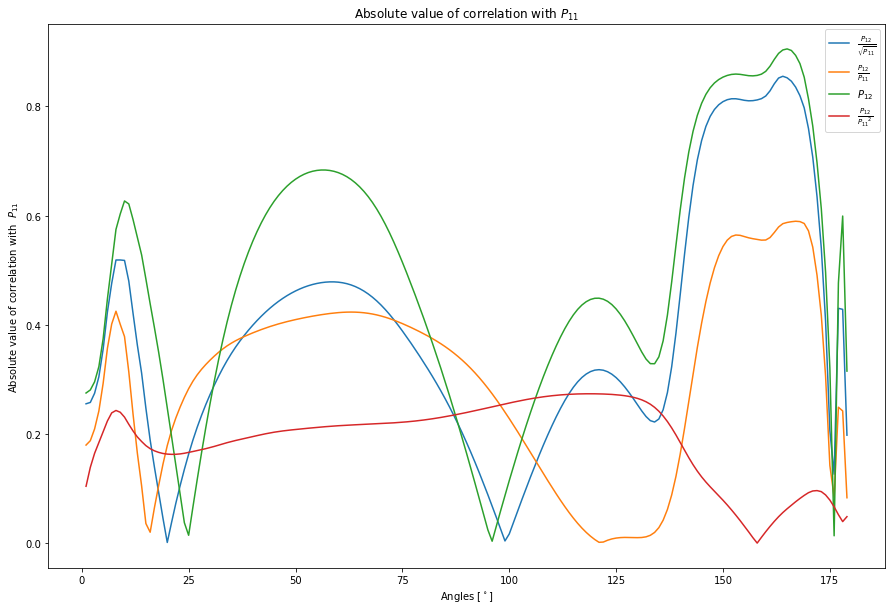

In [5]:
plt.figure(figsize=(15, 10))
plt.title("Absolute value of correlation with $P_{11}$")
plt.plot(np.abs((p_12/np.sqrt(p_11)).corrwith(p_11)), label="$\\frac{P_{12}}{\sqrt{P_{11}}}$")
plt.plot(np.abs((p_12/p_11).corrwith(p_11)), label="$\\frac{P_{12}}{P_{11}}$")
plt.plot(np.abs((p_12).corrwith(p_11)), label='$P_{12}$')
#plt.plot(np.abs((np.log(p_12/p_11)).corrwith(p_11)), label="$\\frac{P_{12}}{P_{11}}$, log")
plt.plot(np.abs((p_12/p_11**2).corrwith(p_11)), label="$\\frac{P_{12}}{{P_{11}}^2}$")
plt.xlabel("Angles [$^\circ$]")
plt.ylabel("Absolute value of correlation with  $P_{11}$")
plt.legend()
#plt.savefig("hi", dpi=700)
#plt.legend(fontsize=6)

#plt.plot(np.abs((p_12/p_11**2).corrwith(p_11)), label="$\\frac{P_{12}}{P_{11}}$")

#plt.show(dpi=500)
plt.show()

Lets look at a gaussain propagation of uncertainty for the case with least correlation, $f = \frac{P_{11}}{{P_{12}}^2}$:
$$\Delta f = \left(\Delta P_{11}^2 \left(\frac{1}{{P_{12}}^2} \right)^2 
+ \Delta P_{12}^2 \left(2\frac{P_{11}}{{P_{12}}^3} \right )^2 \right)^{\frac{1}{2}}$$

If either the value of $P_{11}$ or $P_{12}$ become very small, which as a matter of fact both do, the above uncertainty is going to explode, except for very peculiar cases.

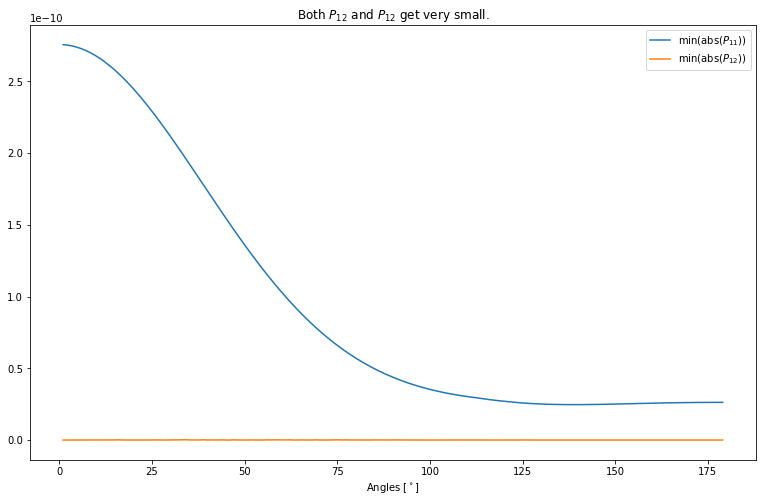

In [6]:
plt.figure(figsize=(13, 8))
plt.title("Both $P_{12}$ and $P_{12}$ get very small.")
plt.plot(np.min(np.abs(p_11), axis=0), label="min(abs($P_{11}$))")
plt.plot(np.min(np.abs(p_12), axis=0), label="min(abs($P_{12}$))")
plt.xlabel("Angles [$^\circ$]")
plt.legend()

In Bohren, D and Huffman, C's `Absorption and Scattering of Light by Small Particles`, Page 112, Equation 4.77.

We find the definitions of the scattered irradiance per unit incident irradiance, given that the incident light is 
- polarized parallel to the scattering plane
$i_{||}:= P_{11} + P_{12}$
- polarized perpendicular to the scattering plane:
$i_{\perp}:= P_{11} - P_{12}$.

Let us consider this, for the propagation of uncertainty in the case of addition is less extreme then for division: $\Delta i_{||} = \Delta i_{\perp} = \left (\Delta P_{11}^2 + \Delta P_{12}^2 \right)^{\frac{1}{2}}$

Text(0.5, 0, 'Angles [$^\\circ$]')

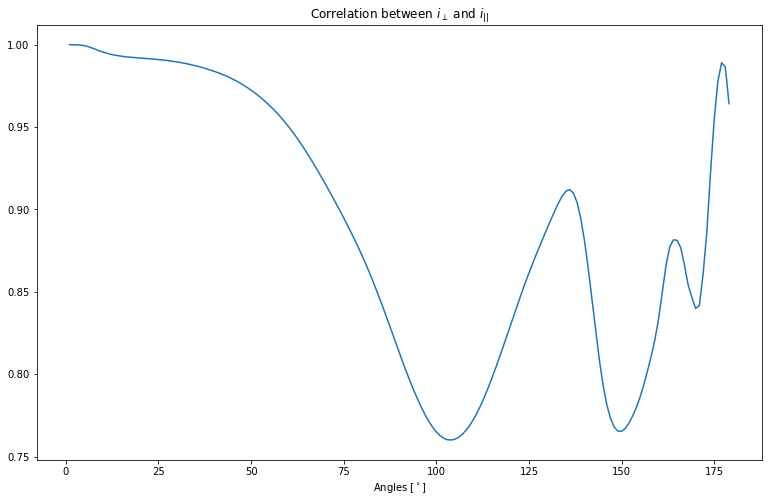

In [7]:
plt.figure(figsize=(13, 8))
plt.title("Correlation between $i_{\perp}$ and $i_{||}$")
plt.plot((p_11 - p_12).corrwith((p_11 + p_12)))
plt.xlabel("Angles [$^\circ$]")

In view of this astonishingly high correlation, one might consider only taking the angular window between, say $75^\circ$ and $175^\circ$ degrees.